# TA3 - Identificação de objetos na imagem com Histograma

### O uso do Backprojection para a identificação de objetos na cena pode ser útil dependendo do contexto da imagem. Quando as cores no objeto buscado ou no background são uniformes, além de ambos possuírem distinção de cores, é possível identificá-lo. Há duas formas de fazer isso: 
* Selecionar uma região do background uniforme como target e usar o resultado do Backprojection como uma máscara invertida.
* Selecionar uma região do objeto uniforme como target e usar o resultado como uma máscara.

## 1. Importação de bibliotecas e imagens

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob

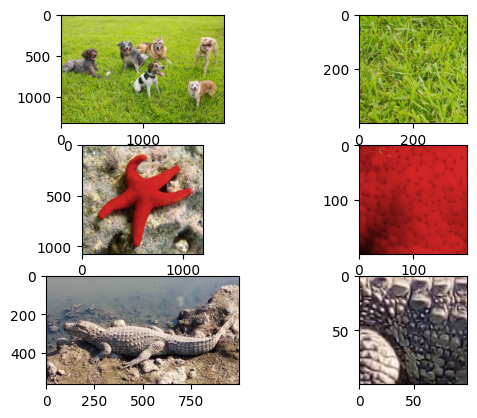

In [6]:
# Imagem dos catioros
dogs = cv.imread('./images/dogs.jpg')
dogs = cv.cvtColor(dogs, cv.COLOR_BGR2RGB)
dogs_hsv = cv.cvtColor(dogs, cv.COLOR_BGR2HSV)

roi_dogs = dogs[800:1200,0:400]
roi_dogs_hsv = cv.cvtColor(roi_dogs, cv.COLOR_BGR2HSV)

# Imagem da estrela do mar
starfish = cv.imread('./images/starfish.jpg')
starfish = cv.cvtColor(starfish, cv.COLOR_BGR2RGB)
starfish_hsv = cv.cvtColor(starfish, cv.COLOR_BGR2HSV)

roi_starfish = starfish[400:600,500:700]
roi_starfish_hsv = cv.cvtColor(roi_starfish, cv.COLOR_BGR2HSV)

# Imagem da girafa
jacare = cv.imread('./images/jacare.jpg')
jacare = cv.cvtColor(jacare, cv.COLOR_BGR2RGB)
jacare_hsv = cv.cvtColor(jacare, cv.COLOR_BGR2HSV)

roi_jacare = jacare[300:400,300:400]
roi_jacare_hsv = cv.cvtColor(roi_jacare, cv.COLOR_BGR2HSV)

fig, axes = plt.subplots(3, 2)
axes[0][0].imshow(dogs)
axes[0][1].imshow(roi_dogs)
axes[1][0].imshow(starfish)
axes[1][1].imshow(roi_starfish)
axes[2][0].imshow(jacare)
axes[2][1].imshow(roi_jacare)

## 2. Aplicação do Backprojection no Background

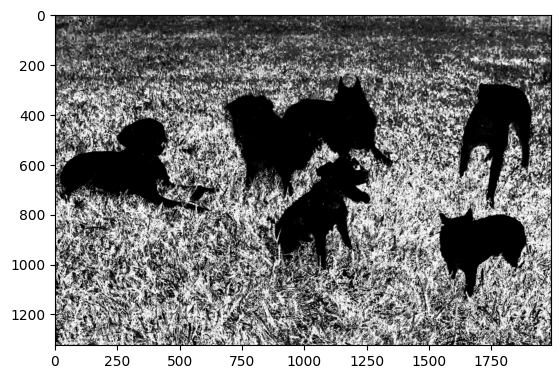

In [20]:
roi_dogs_hist = cv.calcHist([roi_dogs_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_dogs = cv.calcBackProject([dogs_hsv], [0,1], roi_dogs_hist, [0,180,0,256], 1)
plt.imshow(mask_dogs, 'gray')

### 2.1. Tratamento da máscara

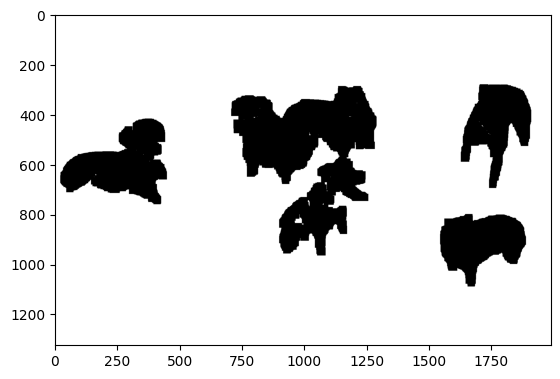

In [21]:
kernel_dogs = np.ones((29,29), dtype=np.uint8)
opening_dogs = cv.morphologyEx(mask_dogs, cv.MORPH_CLOSE, kernel_dogs)
th, mask_dogs_thresh = cv.threshold(opening_dogs, 50, 255, cv.THRESH_BINARY)
plt.imshow(mask_dogs_thresh, 'gray')

### 2.2. Inversão e aplicação das máscara

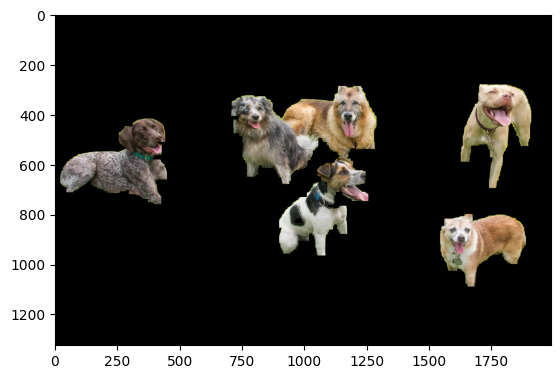

In [22]:
mask_dogs_inverted = cv.bitwise_not(mask_dogs_thresh)
result_dogs = cv.bitwise_and(dogs, dogs, mask= mask_dogs_inverted)
plt.imshow(result_dogs)

## 3. Aplicação do Backprojection no Objeto

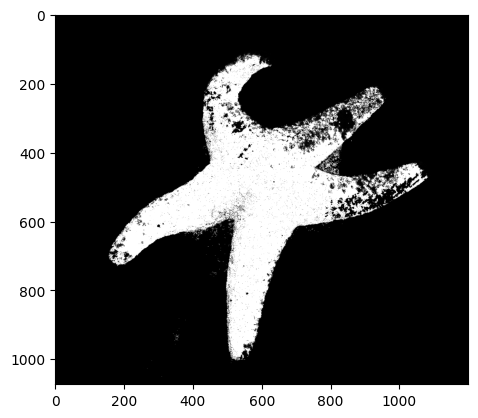

In [23]:
roi_starfish_hist = cv.calcHist([roi_starfish_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_starfish = cv.calcBackProject([starfish_hsv], [0,1], roi_starfish_hist, [0,180,0,256], 1)
plt.imshow(mask_starfish, 'gray')

### 3.1. Tratamento da máscara

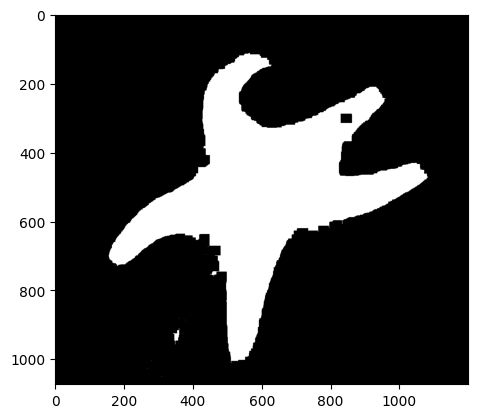

In [24]:
kernel_starfish = np.ones((25,25), dtype=np.uint8)
opening_starfish = cv.morphologyEx(mask_starfish, cv.MORPH_CLOSE, kernel_starfish)
th, mask_starfish_thresh = cv.threshold(opening_starfish, 50, 255, cv.THRESH_BINARY)
plt.imshow(mask_starfish_thresh, 'gray')

### 3.2. Aplicação da máscara

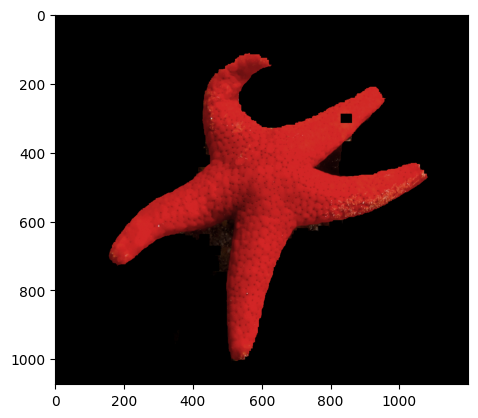

In [25]:
result_starfish = cv.bitwise_and(starfish, starfish, mask=mask_starfish_thresh)
plt.imshow(result_starfish)

## 4. Aplicação de Backprojection no Jacaré (imagem sem uniformidade)

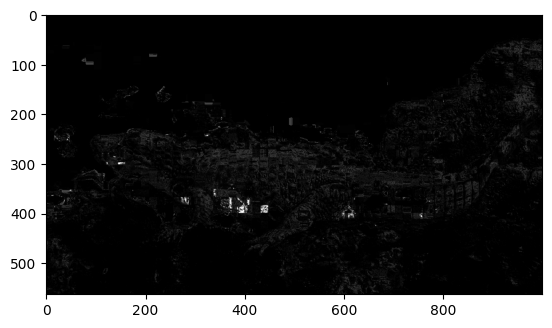

In [26]:
roi_jacare_hist = cv.calcHist([roi_jacare_hsv], [0,1], None, [180,256], [0, 180, 0, 256])
mask_jacare = cv.calcBackProject([jacare_hsv], [0,1], roi_jacare_hist, [0,180,0,256], 1)
plt.imshow(mask_jacare, 'gray')

### 4.1. Tratamento da máscara

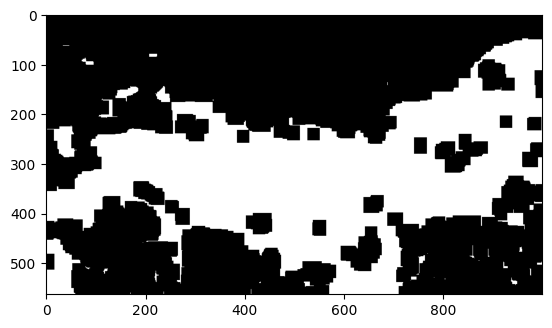

In [27]:
kernel_jacare = np.ones((25,25), dtype=np.uint8)
opening_jacare = cv.morphologyEx(mask_jacare, cv.MORPH_CLOSE, kernel_jacare)
th, mask_jacare_thresh = cv.threshold(opening_jacare, 10, 255, cv.THRESH_BINARY)
plt.imshow(mask_jacare_thresh, 'gray')

### 4.2. Aplicação da máscara

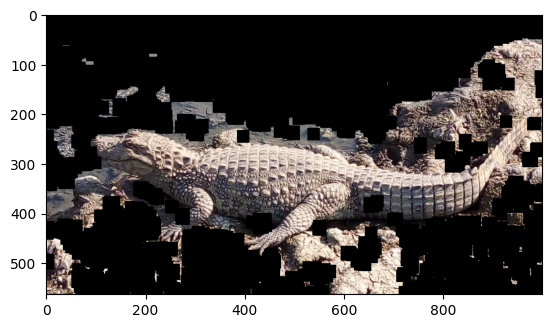

In [28]:
result_jacare = cv.bitwise_and(jacare, jacare, mask=mask_jacare_thresh)
plt.imshow(result_jacare)

### Salva imagens

In [33]:
cv.imwrite('./overleaf/dogs.jpg', cv.cvtColor(dogs, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/roi_dogs.jpg', roi_dogs)
cv.imwrite('./overleaf/mask_dogs.jpg', cv.cvtColor(mask_dogs, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/mask_dogs_thresh.jpg', cv.cvtColor(mask_dogs_thresh, cv.COLOR_RGB2BGR))

cv.imwrite('./overleaf/starfish.jpg', cv.cvtColor(starfish, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/roi_starfish.jpg', cv.cvtColor(roi_starfish, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/mask_starfish.jpg', cv.cvtColor(mask_starfish, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/mask_starfish_thresh.jpg', cv.cvtColor(mask_starfish_thresh, cv.COLOR_RGB2BGR))

cv.imwrite('./overleaf/jacare.jpg', cv.cvtColor(jacare, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/roi_jacare.jpg', cv.cvtColor(roi_jacare, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/mask_jacare.jpg', cv.cvtColor(mask_jacare, cv.COLOR_RGB2BGR))
cv.imwrite('./overleaf/mask_jacare_thresh.jpg', cv.cvtColor(mask_jacare_thresh, cv.COLOR_RGB2BGR))

True

In [35]:
cv.imwrite('./overleaf/roi_dogs.jpg', cv.cvtColor(roi_dogs, cv.COLOR_RGB2BGR))

True